In [2]:
from openbabel import openbabel

In [3]:
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [5]:
def split(word):
    return[char for char in word]

In [6]:
def combine(filepath1, filepath2):
    df1 = pd.read_csv(filepath1, sep='\t')
    df2 = pd.read_csv(filepath2, sep='\t')
    df_final = pd.concat([df1, df2], ignore_index=True, sort=True)
    return(df_final)

In [7]:
def Inchisortbygen(df):
    sorted_status = False
    while sorted_status == False:
        counter = 0
        for i in range(1, len(df['Generation'])):
            current_value = (split(df['Generation'][i]))[-1]
            previous_value = (split(df['Generation'][i-1]))[-1]
            if current_value < previous_value:
                temp_inchi_low = df['Inchi'][i]
                temp_inchi_high = df['Inchi'][i-1]
                df['Inchi'][i] = temp_inchi_high
                df['Inchi'][i-1] = temp_inchi_low
                
                temp_gen_low = df['Generation'][i]
                temp_gen_high = df['Generation'][i-1]
                df['Generation'][i] = temp_gen_high
                df['Generation'][i-1] = temp_gen_low
                
                temp_smiles_low = df['Smiles'][i]
                temp_smiles_high = df['Smiles'][i-1]
                df['Smiles'][i] = temp_smiles_high
                df['Smiles'][i-1] = temp_smiles_low
                
                counter += 1
        if counter == 0:
            sorted_status = True
    return(df)

In [14]:
#NoStereoFormoseAmm = combine('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm_CHNO.tsv', './MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm_CHO.tsv')

In [15]:
#%%time
#NoStereoFormoseAmm = Inchisortbygen(NoStereoFormoseAmm)

CPU times: user 5min 4s, sys: 1.79 s, total: 5min 6s
Wall time: 5min 5s


In [16]:
#NoStereoFormoseAmm.to_csv(r'NoStereoFormoseAmm.tsv', header=None, index=None, sep='\t', mode='a') 

In [17]:
#NoStereoGlucoseAmm = combine('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm_CHNO.tsv', './MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm_CHO.tsv')

In [18]:
#%%time
#NoStereoGlucoseAmm = Inchisortbygen(NoStereoGlucoseAmm)

CPU times: user 12min 34s, sys: 5.16 s, total: 12min 39s
Wall time: 12min 42s


In [19]:
#NoStereoGlucoseAmm.to_csv(r'NoStereoGlucoseAmm.tsv', header=None, index=None, sep='\t', mode='a') 

## Matches vs Generations

In [38]:
def generations_counter(input_data, num_generations):
    gen_data = np.zeros(num_generations+1)
    value_data = np.zeros(num_generations+1)
    
    for i in range(len(gen_data)):
        gen_data[i] = i
        
    for i in range(len(input_data['Generation'])):
        dummy = split(input_data['Generation'][i])
        value = int(dummy[-1])
        value_data[value]+=1
    
    final_value_data = np.zeros(num_generations+1)
    for i in range(1, len(value_data)):
        final_value_data[i] += value_data[i]
        for j in range(i):
            final_value_data[i] += value_data[j]
    
    return(gen_data, final_value_data)

In [39]:
def generations_plot(input_data, num_generations):
    input_data = pd.read_csv(input_data, sep='\t')
    gen_data, final_value_data = generations_counter(input_data, num_generations)
    plt.plot(gen_data, final_value_data, linestyle='--', marker='o')

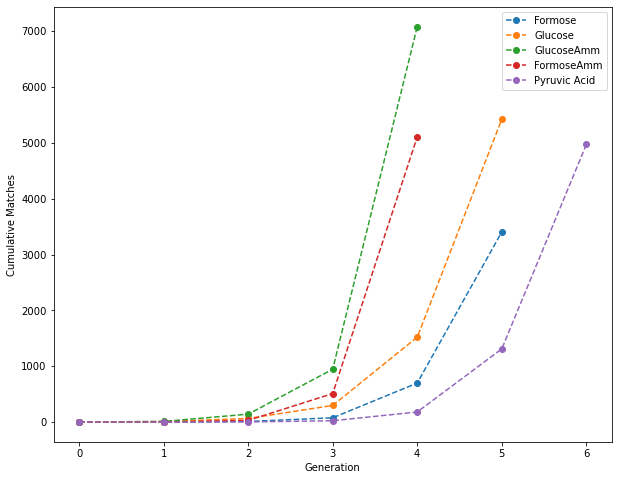

In [40]:
plt.figure(figsize = (10,8))

generations_plot('./MatchedDataNoStereo/FormoseFinal/NoStereoFormoseFinal_CHNO.tsv', 5)
generations_plot('./MatchedDataNoStereo/GlucoseFinal/NoStereoGlucoseFinal_CHNO.tsv', 5)
generations_plot('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm.tsv', 4)
generations_plot('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm.tsv', 4)
generations_plot('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv', 6)

plt.xlabel('Generation')
plt.ylabel('Cumulative Matches')

plt.legend(['Formose','Glucose','GlucoseAmm','FormoseAmm','Pyruvic Acid'])

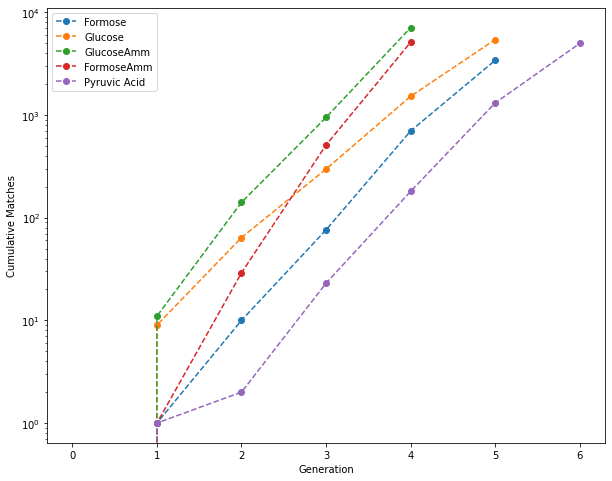

In [41]:
plt.figure(figsize = (10,8))

generations_plot('./MatchedDataNoStereo/FormoseFinal/NoStereoFormoseFinal_CHNO.tsv', 5)
generations_plot('./MatchedDataNoStereo/GlucoseFinal/NoStereoGlucoseFinal_CHNO.tsv', 5)
generations_plot('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm.tsv', 4)
generations_plot('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm.tsv', 4)
generations_plot('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv', 6)

plt.xlabel('Generation')
plt.ylabel('Cumulative Matches')

plt.yscale('Log')

plt.legend(['Formose','Glucose','GlucoseAmm','FormoseAmm','Pyruvic Acid'])

In [57]:
def generations_subplot(input_data, num_generations, row_index, column_index):
        input_data = pd.read_csv(input_data, sep='\t')
        gen_data, final_value_data = generations_counter(input_data, num_generations)
        return(axes[row_index][column_index].plot(gen_data, final_value_data, linestyle='--', marker='o'))

<Figure size 432x288 with 0 Axes>

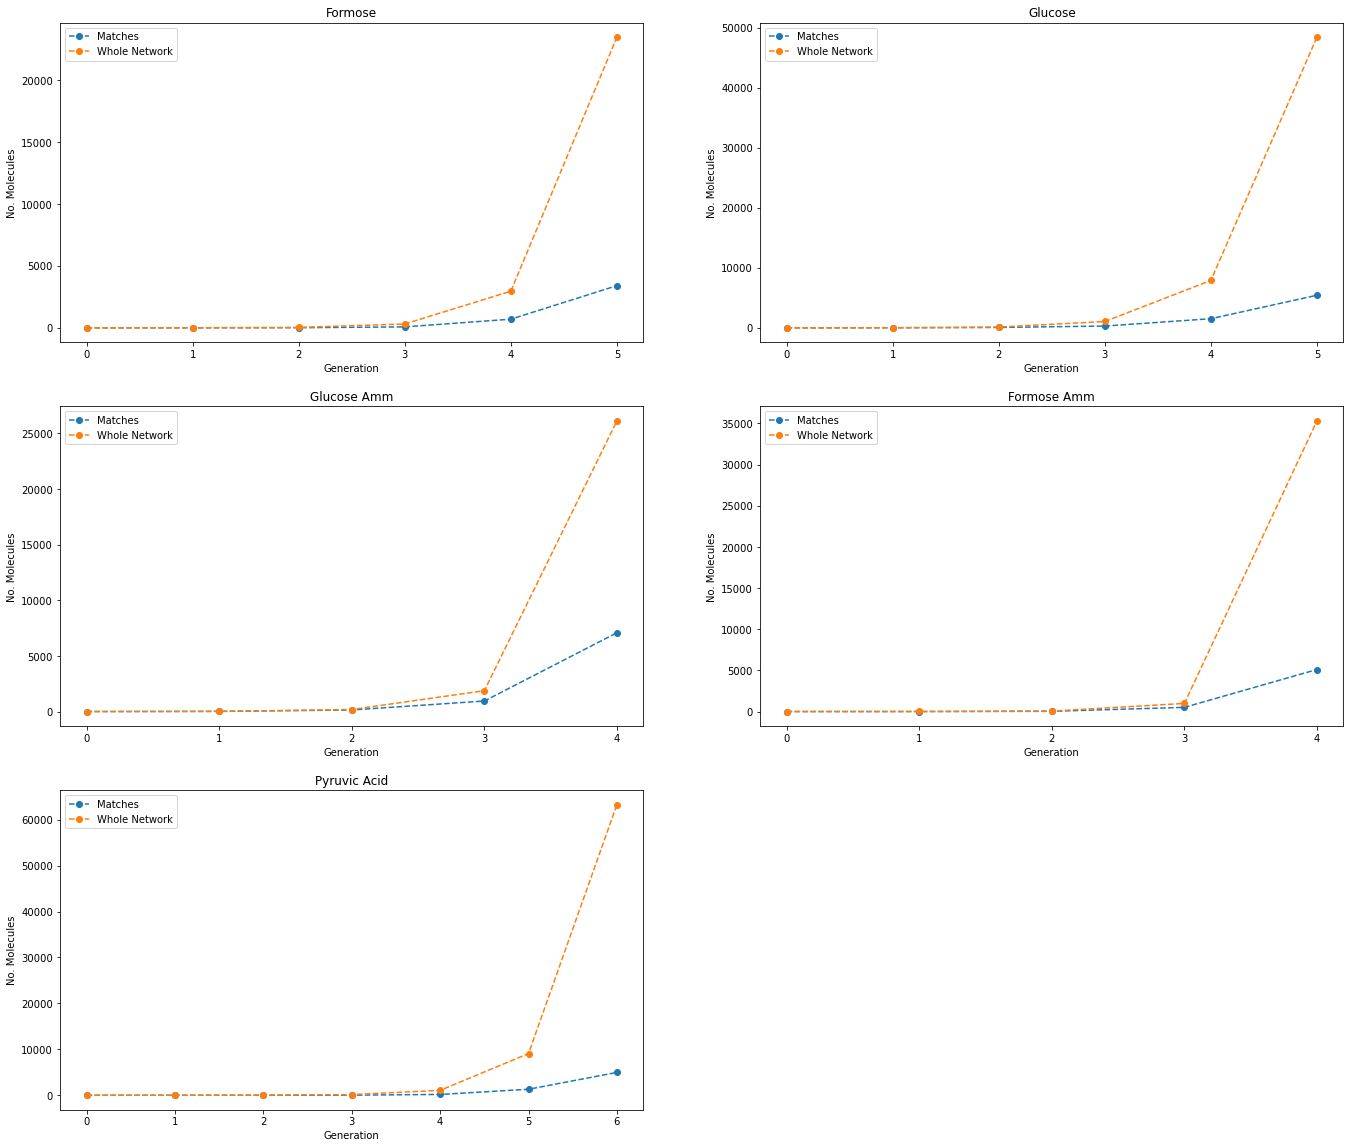

In [77]:
plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (23,20), squeeze=False) 

hplot1 = generations_subplot('./MatchedDataNoStereo/FormoseFinal/NoStereoFormoseFinal_CHNO.tsv', 5, 0, 0)
hplot1 = generations_subplot('./FormoseFinalData/formose_output.tsv', 5, 0, 0)
axes[0][0].set_title('Formose')

hplot2 = generations_subplot('./MatchedDataNoStereo/GlucoseFinal/NoStereoGlucoseFinal_CHNO.tsv', 5, 0, 1)
hplot2 = generations_subplot('./GlucoseFinalData/glucose_degradation_output.tsv', 5, 0, 1)
axes[0][1].set_title('Glucose')

hplot3 = generations_subplot('./MatchedDataNoStereo/GlucoseAmm/NoStereoGlucoseAmm.tsv', 4, 1, 0)
hplot3 = generations_subplot('./GlucoseAmmData/glucose_amm_output.tsv', 4, 1, 0)
axes[1][0].set_title('Glucose Amm')
axes[1][0].set_xticks(np.arange(0, 5, step=1))

hplot4 = generations_subplot('./MatchedDataNoStereo/FormoseAmm/NoStereoFormoseAmm.tsv', 4, 1, 1)
hplot4 = generations_subplot('./FormoseAmmData/formose_amm_output.tsv', 4, 1, 1)
axes[1][1].set_title('Formose Amm')
axes[1][1].set_xticks(np.arange(0, 5, step=1))

hplot1 = generations_subplot('./MatchedDataNoStereo/PyruvicAcid/NoStereoPyruvicAcid_CHNO.tsv', 6, 2, 0)
hplot1 = generations_subplot('./PyruvicAcidData/pyruvic_output.tsv', 6, 2, 0)
axes[2][0].set_title('Pyruvic Acid')

for i in range(3):
    for j in range(2):
        axes[i][j].set_xlabel('Generation')
        axes[i][j].set_ylabel('No. Molecules')
        axes[i][j].legend(['Matches', 'Whole Network'])
        #axes[i][j].set_yscale('Log')

fig.delaxes(axes[2,1])

## Mols2Grid Plot

In [85]:
def display(array, descriptions):
    mols = []
    for i in range(len(array)):
        mol = Chem.MolFromSmiles(array[i])
        mols.append(mol)
    return(Draw.MolsToGridImage(mols, maxMols=100, legends = descriptions))

In [86]:
RepresentativeMatches = pd.read_csv('./Figures/NoStereo/NoStereoMatchesFromEachNetwork.tsv', sep='\t')

In [92]:
Descriptions = ['FormoseAmm G1', 'FormoseAmm G2',
                'FormoseAmm G3', 'FormoseAmm G4', 
                'Formose G1', 'Formose G2',
                'Formose G3', 'Formose G4',
                'Formose G5', 'GlucoseAmm G1',
                'GlucoseAmm G2', 'GlucoseAmm G3', 
                'GlucoseAmm G4', 'Glucose G1',
                'Glucose G2', 'Glucose G3',
                'Glucose G4', 'Glucose G5',
                'Pyruvic Acid G1', 'Pyruvic Acid G2',
                'Pyruvic Acid G3', 'Pyruvic Acid G4',
                'Pyruvic Acid G5', 'Pyruvic Acid G6']

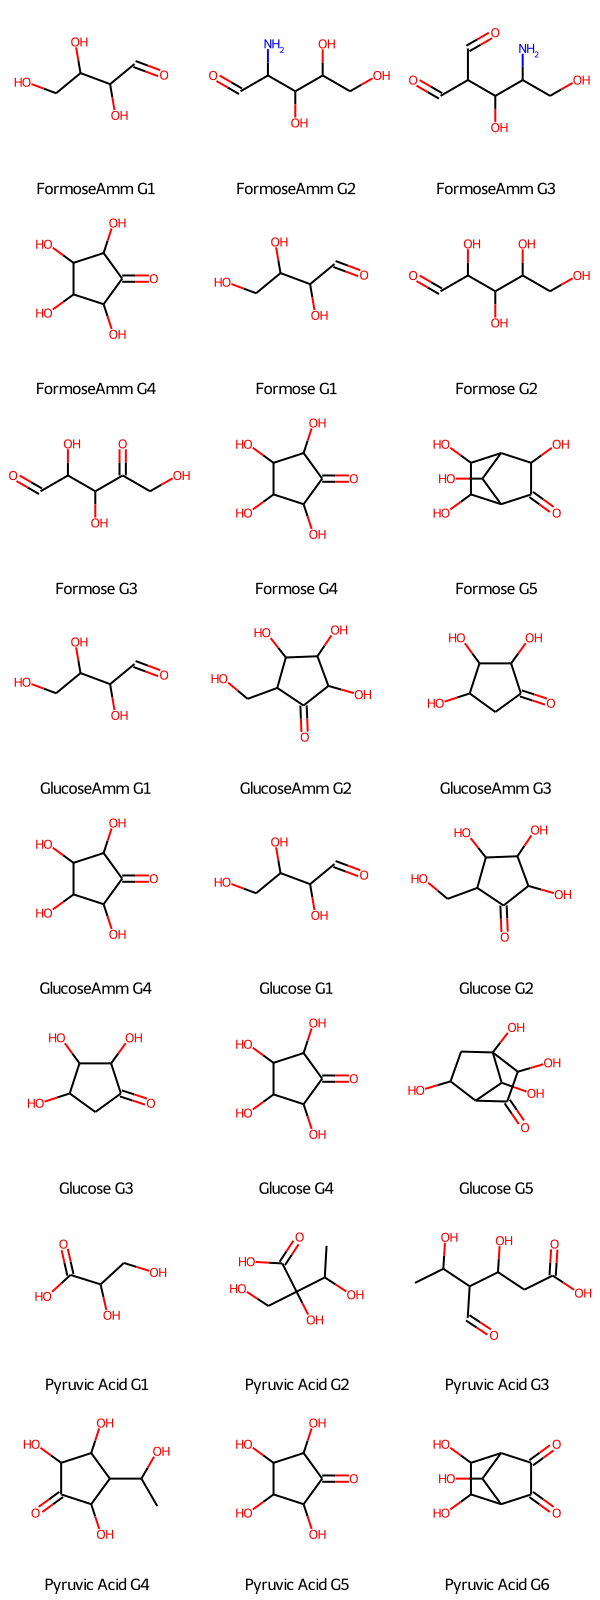

In [94]:
display(RepresentativeMatches['Smiles'], Descriptions)